In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
if ".." not in sys.path:
    sys.path.append("..")

In [3]:
import os
import re
import pandas as pd
from src.text_recognition.net import *
from src.text_recognition.data import *
from src.text_recognition.utils import *

In [4]:
os.environ["TOKENIZERS_PARALLELISM"] = "False"

In [5]:
DATA_DIR = "../data/iam_handwriting"
DATA_DIR_ASCII = f"{DATA_DIR}/ascii"
DATA_DIR_LINES = f"{DATA_DIR}/lines"
DATA_LINES_FILE = f"{DATA_DIR_ASCII}/lines.txt"

In [6]:
processed_lines_file = process_iam_handwriting_txt_files(file_path=DATA_LINES_FILE)
lines_df = get_df(txt_file_name=processed_lines_file, columns=["line_id", "word_segmentation_result", "graylevel", "no_of_components", "bbox_x", "bbox_y", "bbox_w", "bbox_h", "text"])
lines_df["image_path"] = lines_df["line_id"].apply(lambda x: get_image_path(id=x, image_dir=DATA_DIR_LINES))
lines_df["text"] = lines_df["text"].apply(lambda x: process_label(label=x))
lines_df

Skipped ../data/iam_handwriting/ascii/lines.txt processing, as it already exists...


,line_id,word_segmentation_result,graylevel,no_of_components,bbox_x,bbox_y,bbox_w,bbox_h,text,image_path
0,a01-000u-00,ok,154,19,408,746,1661,89,A MOVE to stop Mr. Gaitskell from,../data/iam_handwriting/lines/a01/a01-000u/a01...
1,a01-000u-01,ok,156,19,395,932,1850,105,nominating any more Labour life Peers,../data/iam_handwriting/lines/a01/a01-000u/a01...
2,a01-000u-02,ok,157,16,408,1106,1986,105,is to be made at a meeting of Labour,../data/iam_handwriting/lines/a01/a01-000u/a01...
3,a01-000u-03,err,156,23,430,1290,1883,70,M Ps tomorrow . Mr. Michael Foot has,../data/iam_handwriting/lines/a01/a01-000u/a01...
4,a01-000u-04,ok,157,20,395,1474,1830,94,put down a resolution on the subject,../data/iam_handwriting/lines/a01/a01-000u/a01...
...,...,...,...,...,...,...,...,...,...,...
13066,r06-143-00,ok,186,15,352,715,1447,115,In the train going back to London I sat,../data/iam_handwriting/lines/r06/r06-143/r06-...
13067,r06-143-01,ok,185,17,348,875,1692,139,beside,../data/iam_handwriting/lines/r06/r06-143/r06-...
13068,r06-143-02,ok,186,29,364,1067,1873,123,"in front of her , but she said : ' Philip 's a...",../data/iam_handwriting/lines/r06/r06-143/r06-...
13069,r06-143-03,ok,184,17,344,1250,1577,104,I wish I went to that school . Did you notice,../data/iam_handwriting/lines/r06/r06-143/r06-...


In [7]:
train_lines_df, val_lines_df, test_lines_df = split_data(df=lines_df)
train_lines_df

,line_id,word_segmentation_result,graylevel,no_of_components,bbox_x,bbox_y,bbox_w,bbox_h,text,image_path
9018,h07-078a-06,err,139,30,182,1743,2109,162,"skilled labour , especially in the finishing t...",../data/iam_handwriting/lines/h07/h07-078a/h07...
10481,l07-103-03,ok,169,25,350,1200,1880,107,evening I 'll run you up there,../data/iam_handwriting/lines/l07/l07-103/l07-...
2291,b04-154-04,ok,182,17,363,1426,1890,159,against African fanatics and woolly minded,../data/iam_handwriting/lines/b04/b04-154/b04-...
2932,c03-000b-02,ok,153,11,319,1123,1690,125,tomorrow . It has been produced and directed by,../data/iam_handwriting/lines/c03/c03-000b/c03...
7708,g06-047j-06,ok,182,29,364,1768,1997,170,"of Europe . One of these was the Neapolitan ,",../data/iam_handwriting/lines/g06/g06-047j/g06...
...,...,...,...,...,...,...,...,...,...,...
3369,c03-096b-05,ok,151,13,353,1662,1662,122,"that he is not asking us to believe that ,",../data/iam_handwriting/lines/c03/c03-096b/c03...
1405,a05-053-07,ok,176,23,381,2006,1751,71,who was winding up the foreign affairs,../data/iam_handwriting/lines/a05/a05-053/a05-...
3200,c03-084b-00,ok,154,12,314,741,1763,136,Mr. Bryan Stonehouse's production is quietly,../data/iam_handwriting/lines/c03/c03-084b/c03...
13000,r06-106-07,ok,184,15,350,1995,1772,122,more than ever like a pink and gold,../data/iam_handwriting/lines/r06/r06-106/r06-...


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Before squeezing the image size -> torch.Size([32, 3, 384, 384])
Before squeezing the label size -> torch.Size([32, 150])
The input image size -> torch.Size([3, 384, 384])
The label size -> torch.Size([150])
The text in the image -> of a great amount of work,


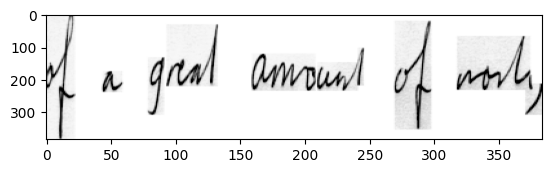

In [8]:
# Get pytorch dataset
dataset = TrOCRData(train_df=train_lines_df, val_df=val_lines_df, test_df=test_lines_df)
train_dataloader, val_dataloader, test_dataloader = dataset.get_data_loaders()
dataset.visualize()

In [66]:
model = OCRModel(
    train_loader=train_dataloader,
    val_loader=val_dataloader,
    test_loader=test_dataloader,
    device="mps",
    freeze_model=True,
    trainable_layers=[],
    verbose_step=1,
    save_path_dir="../logs/text_recognition_logs/pytorch"
)

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


No model loaded as `saved_model` not provided.
Freezing model...
Model froze...
VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=False)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=False)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
         

In [67]:
model.configure_optimizers()

In [68]:
trained_model, best_model = model.train()


DEVICE - mps || EPOCHS - 10 || LEARNING RATE - 5e-05.

Skipping training as model params are all frozen.


Testing model...


0it [00:00, ?it/s]/opt/miniconda3/envs/ocr/lib/python3.9/site-packages/transformers/generation/utils.py:1270: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation )
  warnings.warn(
/opt/miniconda3/envs/ocr/lib/python3.9/site-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (64) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
0it [00:36, ?it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



 TEST-LOSS - 0.00054 || TIME ELAPSED - 52.30s.



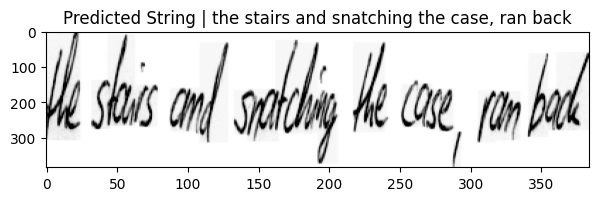

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


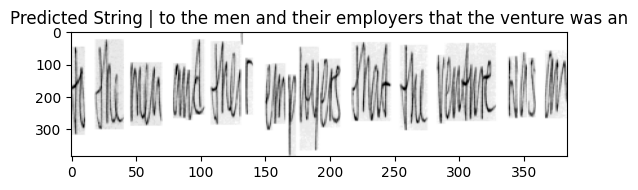

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


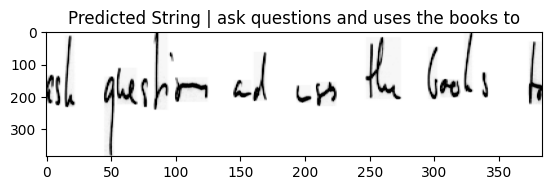

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


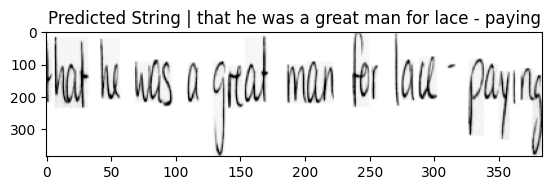

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


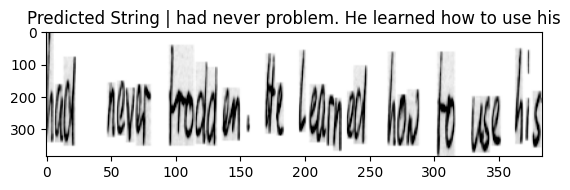

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


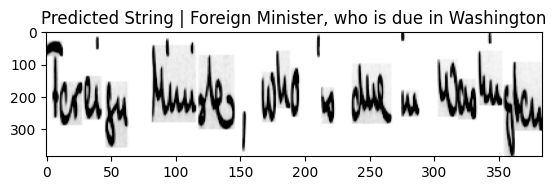

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


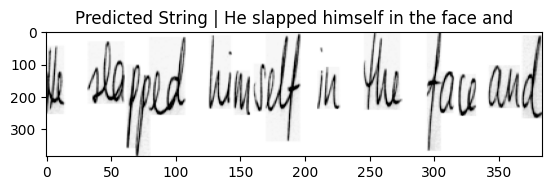

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


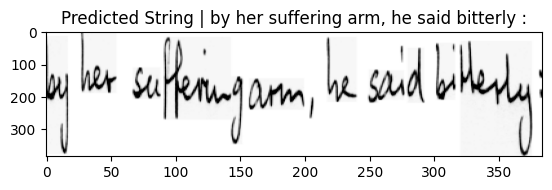

In [69]:
model.test()